# The *rank-turbulence divergence*
____________________

What follows is a python playground looking at the recent paper:
- Dodds, P.S.,  Minot, J. R., Arnold, M. V., Alshaabi, T., Adams, J. L., Dewhurst, D. R., Gray, T. J., Frank, M. R., Reagan, A. J., Danforth C. M. (2020). *Allotaxonometry and rank-turbulence divergence: A universal instrument for comparing complex systems.* [arXiv 2002.09770](https://arxiv.org/abs/2002.09770).

In the paper, the authors propose a novel way to quantify the differences between two ranked vectors. I'm a big soccer fan, so let's start by asking the following question: How different was the final Premier League table over the last few years?

| Rank | Team (2019) | Team (2018) | Team (2017) | Team (2016) | Team (2015) | Team (2014) |
|------|------|------|------|------|------|------|
|   1  | Manchester City| Manchester City| Chelsea| Leicester City| Chelsea| Manchester City|
|   2  | Liverpool| Manchester United| Tottenham Hotspur| Arsenal| Manchester City| Liverpool|
|   3  | Chelsea| Tottenham Hotspur| Manchester City| Tottenham Hotspur| Arsenal| Chelsea|
|   4  | Tottenham Hotspur| Liverpool| Liverpool| Manchester City| Manchester United| Arsenal|
|   5  | Arsenal| Chelsea| Arsenal| Manchester United| Tottenham Hotspur| Everton|
|   6  | Manchester United| Arsenal| Manchester United|Southampton| Liverpool| Tottenham Hotspur|
|   7  | Wolverhampton Wanderers| Burnley| Everton| West Ham United| Southampton| Manchester United|
|   8  | Everton| Everton| Southampton| Liverpool| Swansea City| Southampton|
|   9  | Leicester City| Leicester City| Bournemouth| Stoke City|Stoke City| Stoke City|
|  10  | West Ham United| Newcastle United| West Bromwich Albion| Chelsea| Crystal Palace| Newcastle United|
|  11  | Watford| Crystal Palace| West Ham United| Everton| Everton| Crystal Palace|
|  12  | Crystal Palace| Bournemouth| Leicester City| Swansea City| West Ham United| Swansea City|
|  13  | Newcastle United| West Ham United| Stoke City| Watford| West Bromwich Albion| West Ham United|
|  14  | Bournemouth| Watford| Crystal Palace| West Bromwich Albion| Leicester City| Sunderland|
|  15  | Burnley| Brighton and Hove Albion| Swansea City| Crystal Palace| Newcastle United| Aston Villa|
|  16  | Southampton| Huddersfield Town| Burnley| Bournemouth| Sunderland| Hull City|
|  17  | Brighton and Hove Albion| Southampton| Watford| Sunderland| Aston Villa| West Bromwich Albion|
|  18  | Cardiff City| Swansea City| Hull City| Newcastle United| Hull City| Norwich City|
|  19  | Fulham| Stoke City| Middlesbrough| Norwich City| Burnley| Fulham|
|  20  | Huddersfield Town| West Bromwich Albion| Sunderland| Aston Villa| Queens Park Rangers| Cardif City|

It's well known that Leicester winning the league was *crazy*. Just how crazy though? Can we quantify the differences in the rankings between years? This is a relatively basic example on a relatively simple ranking system. What about when the rankings are more *natural* (i.e., more complex)? We know that there's a lot of "heavy-tailed" distributions (think rankings of follower-counts of Twitter users, ranks of earthquake sizes, etc.). We need an instrument that can quantify differences between those types of data. Importantly, typical probability-based comparison tools are often insufficient to deal with these distributions.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [2]:
premier_league = {2019:['Manchester City','Liverpool','Chelsea','Tottenham Hotspur',
                        'Arsenal','Manchester United','Wolverhampton Wanderers','Everton',
                        'Leicester City','West Ham United','Watford','Crystal Palace',
                        'Newcastle United','Bournemouth','Burnley','Southampton',
                        'Brighton and Hove Albion','Cardiff City','Fulham','Huddersfield Town'],
                  2018:['Manchester City','Manchester United','Tottenham Hotspur','Liverpool',
                        'Chelsea','Arsenal','Burnley','Everton',
                        'Leicester City','Newcastle United','Crystal Palace','Bournemouth',
                        'West Ham United','Watford','Brighton and Hove Albion','Huddersfield Town',
                        'Southampton','Swansea City','Stoke City','West Bromwich Albion'],
                  2017:['Chelsea','Tottenham Hotspur','Manchester City','Liverpool',
                        'Arsenal','Manchester United','Everton','Southampton',
                        'Bournemouth','West Bromwich Albion','West Ham United','Leicester City',
                        'Stoke City','Crystal Palace','Swansea City','Burnley',
                        'Watford','Hull City','Middlesbrough','Sunderland'],
                  2016:['Leicester City','Arsenal','Tottenham Hotspur','Manchester City',
                        'Manchester United','Southampton','West Ham United','Liverpool',
                        'Stoke City','Chelsea','Everton','Swansea City',
                        'Watford','West Bromwich Albion','Crystal Palace','Bournemouth',
                        'Sunderland','Newcastle United','Norwich City','Aston Villa'],
                  2015:['Chelsea','Manchester City','Arsenal','Manchester United',
                        'Tottenham Hotspur','Liverpool','Southampton','Swansea City',
                        'Stoke City','Crystal Palace','Everton','West Ham United',
                        'West Bromwich Albion','Leicester City','Newcastle United','Sunderland',
                        'Aston Villa','Hull City','Burnley','Queens Park Rangers'],
                  2014:['Manchester City','Liverpool','Chelsea','Arsenal',
                        'Everton','Tottenham Hotspur','Manchester United','Southampton',
                        'Stoke City','Newcastle United','Crystal Palace','Swansea City',
                        'West Ham United','Sunderland','Aston Villa','Hull City',
                        'West Bromwich Albion','Norwich City','Fulham','Cardif City']}

In [3]:
from rtd import get_rank_dictionary, get_combined_domain, rank_turbulence_divergence

In [4]:
print("how far is 2019's ranking...",premier_league[2019])
print()
print("...to the 2018 ranking?", premier_league[2018])

how far is 2019's ranking... ['Manchester City', 'Liverpool', 'Chelsea', 'Tottenham Hotspur', 'Arsenal', 'Manchester United', 'Wolverhampton Wanderers', 'Everton', 'Leicester City', 'West Ham United', 'Watford', 'Crystal Palace', 'Newcastle United', 'Bournemouth', 'Burnley', 'Southampton', 'Brighton and Hove Albion', 'Cardiff City', 'Fulham', 'Huddersfield Town']

...to the 2018 ranking? ['Manchester City', 'Manchester United', 'Tottenham Hotspur', 'Liverpool', 'Chelsea', 'Arsenal', 'Burnley', 'Everton', 'Leicester City', 'Newcastle United', 'Crystal Palace', 'Bournemouth', 'West Ham United', 'Watford', 'Brighton and Hove Albion', 'Huddersfield Town', 'Southampton', 'Swansea City', 'Stoke City', 'West Bromwich Albion']


__________________

Let's first find a way to compare these two lists on the same scale by getting a combined domain

In [5]:
combined_domain = get_combined_domain(premier_league[2019], premier_league[2018])
print(combined_domain)

['Manchester City', 'Wolverhampton Wanderers', 'Leicester City', 'Swansea City', 'Everton', 'Liverpool', 'Fulham', 'Bournemouth', 'Watford', 'Crystal Palace', 'Southampton', 'Burnley', 'Brighton and Hove Albion', 'Newcastle United', 'Arsenal', 'West Bromwich Albion', 'Tottenham Hotspur', 'Cardiff City', 'Stoke City', 'Manchester United', 'West Ham United', 'Chelsea', 'Huddersfield Town']


Next, let's see if we can make a universal object that can let us rank all sorts of vectors. For me, I like dictionaries...

In [6]:
C_2019 = {val:0 for val in combined_domain}
C_2018 = {val:0 for val in combined_domain}

In [7]:
Ranking2019, N_teams2019 = get_rank_dictionary(premier_league[2019],C_2019)
Ranking2018, N_teams2018 = get_rank_dictionary(premier_league[2018],C_2018)

In [8]:
print("2019:\n", Ranking2019,'\n')
print("2018:\n", Ranking2018)

2019:
 {'Manchester City': 1.0, 'Wolverhampton Wanderers': 7.0, 'Leicester City': 9.0, 'Swansea City': 22.0, 'Everton': 8.0, 'Liverpool': 2.0, 'Fulham': 19.0, 'Bournemouth': 14.0, 'Watford': 11.0, 'Crystal Palace': 12.0, 'Southampton': 16.0, 'Burnley': 15.0, 'Brighton and Hove Albion': 17.0, 'Newcastle United': 13.0, 'Arsenal': 5.0, 'West Bromwich Albion': 22.0, 'Tottenham Hotspur': 4.0, 'Cardiff City': 18.0, 'Stoke City': 22.0, 'Manchester United': 6.0, 'West Ham United': 10.0, 'Chelsea': 3.0, 'Huddersfield Town': 20.0} 

2018:
 {'Manchester City': 1.0, 'Wolverhampton Wanderers': 22.0, 'Leicester City': 9.0, 'Swansea City': 18.0, 'Everton': 8.0, 'Liverpool': 4.0, 'Fulham': 22.0, 'Bournemouth': 12.0, 'Watford': 14.0, 'Crystal Palace': 11.0, 'Southampton': 17.0, 'Burnley': 7.0, 'Brighton and Hove Albion': 15.0, 'Newcastle United': 10.0, 'Arsenal': 6.0, 'West Bromwich Albion': 20.0, 'Tottenham Hotspur': 3.0, 'Cardiff City': 22.0, 'Stoke City': 19.0, 'Manchester United': 2.0, 'West Ham Un

The `{team: rank dictionary}` illustrates what happens when the two domains are not identical we use what's called "fractional ranking" where you average the ranks that the missing teams *would have* received if they were present. This allows us to compare a wide variety of things.

## Now that we have rankings, how should we quantify the differences?

...once again, the paper nicely walks us through this process. The authors detail 11 desirable qualities that an idealized measure ought to have. Quoting from their paper:

1. Rank-based: Directly built for comparing ranked lists generated by any meaningful ordering.

2. Symmetric: $D(R_1||R_2) = D(R_2||R_1)$

3. Semi-positive: $D(R_1||R_2)\geq 0$, and $D(R_1||R_2) = 0$ only if the systems are formed by the same components with matching rankings, $R_1 = R_2$.

4. Metric-capable: Given the preceding two conditions are met, we would need $D$ to also satisfy the triangle inequality.

5. Scale and unit invariant: This is automatic because rankings will not change if either one or both systems are rescaled in their entirety, or remeasured according to a different system of units.

6. Linearly separable, for interpretability. Rach type, $\tau$, additively contributes to rank-turbulence divergence a quantity $\delta D$, allowing for simple ranking of types to assess importance.

7. Subsystem applicable: Ranked lists of any principled subset may be equally well compared (e.g., hashtags on Twitter, stock prices of a certain sector, etc.).
    
8. Effective across system sizes, possibly size independent: While not being explicitly interpretable as certain probability divergences (e.g., KullbackLeibler divergence), rank-turbulence divergence should be normalizable to allow for sensible comparisons of rank-turbulence divergences across system sizes. Linear separability means that whatever normalization we use, the ordering of contributions of individual types will be unchanged.

9. *Zipfophilic*: Rank-turbulence divergence should be applicable to systems with rank-ordered component size distributions that are heavy-tailed.

10. Tunable: The acknowledgment that while many stand-alone divergences exist for probability distributions, in practice there are families of divergences on offer, and these have the potential to be adaptive and provide much more power and insight.

11. Storyfinding: Features 1–10 will ideally combine to help us rapidly see which types are most important in distinguishing two ranked lists.

Following this, the authors go on to ultimately define the *rank-turbulence divergence* based on these features.

For the most detailed version of this definition, including motivation and discussion of its various features, see Section II.D (no relation) of the paper.

\begin{align}
    D_{\alpha}^{R}(R_1||R_2) &= \sum_{\tau \in R_{1,2;\alpha}} \delta D_{\alpha,\tau}^{R}(R_1||R_2)\\
    &= \dfrac{1}{\mathcal{N}_{1,2;\alpha}} \dfrac{\alpha+1}{\alpha} \sum_{\tau \in R_{1,2;\alpha}} \Big\vert \dfrac{1}{\big[r_{\tau,1}\big]^\alpha} - \dfrac{1}{\big[r_{\tau,2}\big]^\alpha} \Big\vert^{1/(\alpha+1)}
\end{align}

where $r$ refers to the (float) ranking of element $\tau$ (in our example, this refers to premier league teams), such that $r=1.0$ is the first place team. The $\mathcal{N}_{1,2,\alpha}$ term refers to a normalization factor that forces the rank-turbulence divergence to be between 0 and 1 and is expressed as follows:

\begin{align}
    \mathcal{N}_{1,2;\alpha} &= \dfrac{\alpha+1}{\alpha} \sum_{\tau \in R_1} \Big\vert \dfrac{1}{\big[r_{\tau,1}\big]^\alpha} - \dfrac{1}{\big[N_1 + \frac{1}{2}N_2\big]^\alpha} \Big\vert^{1/(\alpha+1)} \\&+ \dfrac{\alpha+1}{\alpha} \sum_{\tau \in R_1} \Big\vert \dfrac{1}{\big[N_2 + \frac{1}{2}N_1\big]^\alpha} - \dfrac{1}{\big[r_{\tau,2}\big]^\alpha} \Big\vert^{1/(\alpha+1)}
\end{align}

### Walk-through: implementing the rank-turbulence divergence

In [9]:
# recall we have the following two dictionaries with the teams and their ranks in 2019 and 2018:
for team in sorted(combined_domain):
    print("%s:\n\t2019 ranking: %.1f\n\t2018 ranking: %.1f\n"%(team, 
                                                               Ranking2019[team],
                                                               Ranking2018[team]))

Arsenal:
	2019 ranking: 5.0
	2018 ranking: 6.0

Bournemouth:
	2019 ranking: 14.0
	2018 ranking: 12.0

Brighton and Hove Albion:
	2019 ranking: 17.0
	2018 ranking: 15.0

Burnley:
	2019 ranking: 15.0
	2018 ranking: 7.0

Cardiff City:
	2019 ranking: 18.0
	2018 ranking: 22.0

Chelsea:
	2019 ranking: 3.0
	2018 ranking: 5.0

Crystal Palace:
	2019 ranking: 12.0
	2018 ranking: 11.0

Everton:
	2019 ranking: 8.0
	2018 ranking: 8.0

Fulham:
	2019 ranking: 19.0
	2018 ranking: 22.0

Huddersfield Town:
	2019 ranking: 20.0
	2018 ranking: 16.0

Leicester City:
	2019 ranking: 9.0
	2018 ranking: 9.0

Liverpool:
	2019 ranking: 2.0
	2018 ranking: 4.0

Manchester City:
	2019 ranking: 1.0
	2018 ranking: 1.0

Manchester United:
	2019 ranking: 6.0
	2018 ranking: 2.0

Newcastle United:
	2019 ranking: 13.0
	2018 ranking: 10.0

Southampton:
	2019 ranking: 16.0
	2018 ranking: 17.0

Stoke City:
	2019 ranking: 22.0
	2018 ranking: 19.0

Swansea City:
	2019 ranking: 22.0
	2018 ranking: 18.0

Tottenham Hotspur:
	2019 

Even though we'll skip over interpreting $\alpha$ for the time being, there's a couple of terms that show up over and over. Let's define those up front:

In [10]:
# arbitrarily, let's set alpha to 1.0 for the time being
alpha = 1.0

alph_exp = 1 / (alpha+1)
alph_mul = (alpha+1) / alpha

# then two more simple ones in the normalization
normN_2019 = (N_teams2019 + 0.5 * N_teams2018)**-alpha
normN_2018 = (N_teams2018 + 0.5 * N_teams2019)**-alpha

The rank turbulence divergence involves spanning over all elements, $\tau$, in the ranking (all premier league teams) and summing together their contribution to the overall rank turbulence divergence.

In [11]:
rank_turbule_divergence = 0
normalization_term_2019 = 0
normalization_term_2018 = 0

for tau in combined_domain:
    r1tau_exp_negalpha = Ranking2019[tau]**-alpha
    r2tau_exp_negalpha = Ranking2018[tau]**-alpha
    dQ = np.abs(r1tau_exp_negalpha - r2tau_exp_negalpha)

    normalization_term_2019 += np.abs(r1tau_exp_negalpha - normN_2019)**alph_exp
    normalization_term_2018 += np.abs(normN_2018 - r2tau_exp_negalpha)**alph_exp

    rank_turbule_divergence += dQ**alph_exp
    
# now do the last normalization step
Normalization = alph_mul * normalization_term_2019 + alph_mul * normalization_term_2018
Q = 1/Normalization * alph_mul * rank_turbule_divergence
print("The rank-turbulence divergence between 2018 and 2019's rankings is %.6f"%(Q))

The rank-turbulence divergence between 2018 and 2019's rankings is 0.284396


______________________

### This is all laid out in the rtd.py file attached
Note also that the following inputs can each be used in this function:

In [12]:
# already-ranked vectors
inputA_1 = ['a', 'e', 'c', 'b', 'f', 'g', 'd']
inputA_2 = ['b', 'a', 'e', 'd', 'c', 'f', 'g']

print('inputA_1:\n\t',inputA_1)
print()
print('inputA_2:\n\t',inputA_2)
print()
print("\t rtd =",rank_turbulence_divergence(inputA_1,inputA_2))

inputA_1:
	 ['a', 'e', 'c', 'b', 'f', 'g', 'd']

inputA_2:
	 ['b', 'a', 'e', 'd', 'c', 'f', 'g']

	 rtd = 0.45924793111057804


In [13]:
# raw output, maybe from a survey
#### quick little data creation, 1 moment...
inputA_1 = ['a']*20 + ['e']*14 + ['c']*8 + ['b']*7 + ['f']*4 + ['g']*2 + ['d']*1
np.random.shuffle(inputA_1)

inputA_2 = ['b']*24 + ['a']*16 + ['e']*5 + ['d']*4 + ['c']*3 + ['f']*2 + ['g']*1
np.random.shuffle(inputA_2)

print('inputA_1:\n\t',inputA_1)
print()
print('inputA_2:\n\t',inputA_2)
print()
print("\t rtd =",rank_turbulence_divergence(inputA_1,inputA_2))

inputA_1:
	 ['g', 'b', 'a', 'b', 'e', 'e', 'g', 'e', 'b', 'a', 'e', 'a', 'a', 'e', 'a', 'd', 'b', 'e', 'e', 'a', 'e', 'a', 'e', 'a', 'a', 'a', 'c', 'c', 'f', 'b', 'f', 'a', 'f', 'a', 'c', 'f', 'e', 'a', 'a', 'a', 'c', 'c', 'b', 'a', 'a', 'a', 'c', 'b', 'e', 'e', 'a', 'e', 'c', 'c', 'e', 'a']

inputA_2:
	 ['a', 'b', 'b', 'b', 'a', 'b', 'e', 'a', 'e', 'b', 'b', 'd', 'a', 'g', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'c', 'd', 'e', 'b', 'b', 'f', 'b', 'd', 'b', 'e', 'b', 'a', 'f', 'b', 'a', 'c', 'b', 'd', 'b', 'a', 'a', 'b', 'a', 'b', 'a', 'c', 'a', 'b', 'e', 'a', 'b', 'a']

	 rtd = 0.45924793111057804


In [14]:
# counts dictionary
from collections import Counter
inputA_1 = dict(Counter(inputA_1))
inputA_2 = dict(Counter(inputA_2))

print('inputA_1:\n\t',inputA_1)
print()
print('inputA_2:\n\t',inputA_2)
print()
print("\t rtd =",rank_turbulence_divergence(inputA_1,inputA_2))

inputA_1:
	 {'g': 2, 'b': 7, 'a': 20, 'e': 14, 'd': 1, 'c': 8, 'f': 4}

inputA_2:
	 {'a': 16, 'b': 24, 'e': 5, 'd': 4, 'g': 1, 'c': 3, 'f': 2}

	 rtd = 0.45924793111057804


_____________________

# Simple illustration of the $\alpha$ in the rank-turbulence divergence:

How far apart are the following two rankings? (the $l$ subscript is going to mean this will be plotted on the left...)
- $X_{1, l} = $['a', 'e', 'c', 'b', 'f', 'g', 'd']
- $X_{2, l} = $['b', 'a', 'e', 'd', 'c', 'f', 'g']

And can we capture a metric that picks up on whether or not the 1st place ranking is the same/different? (the $r$ subscript is going to mean this will be plotted on the right...) For example:
- $X_{1, r} = $['a', 'e', 'c', 'b', 'f', 'g', 'd']
- $X_{2, r} = $['a', 'b', 'e', 'd', 'c', 'f', 'g']

In [15]:
X1l = ['a', 'e', 'c', 'b', 'f', 'g', 'd']
X2l = ['b', 'a', 'e', 'd', 'c', 'f', 'g']

combined_domainl = get_combined_domain(X1l, X2l)
print('the combined domain of these two vectors is', combined_domainl)

the combined domain of these two vectors is ['d', 'c', 'g', 'b', 'e', 'a', 'f']


In [16]:
# from this, create two empty shells that will be populated by the "fractional rank score"
C1l = {i: 0 for i in combined_domainl}
C2l = {i: 0 for i in combined_domainl}
R1l, N1l = get_rank_dictionary(X1l, C1l)
R2l, N2l = get_rank_dictionary(X2l, C2l)

print("R1l =", R1l, "\nhas the same combined_domain as `R2l`,",
      "and is currently populated by rank scores of `X1l`\n")
print("R2l =", R2l, "\nhas the same combined_domain as `R1l`,",
      "and is currently populated by rank scores of `X2l`\n")

R1l = {'d': 7.0, 'c': 3.0, 'g': 6.0, 'b': 4.0, 'e': 2.0, 'a': 1.0, 'f': 5.0} 
has the same combined_domain as `R2l`, and is currently populated by rank scores of `X1l`

R2l = {'d': 4.0, 'c': 5.0, 'g': 7.0, 'b': 1.0, 'e': 3.0, 'a': 2.0, 'f': 6.0} 
has the same combined_domain as `R1l`, and is currently populated by rank scores of `X2l`



In [17]:
# also do the same thing for the slightly-different pair of vectors
X1r = ['a', 'e', 'c', 'b', 'f', 'g', 'd']
X2r = ['a', 'b', 'e', 'd', 'c', 'f', 'g']

combined_domainr = get_combined_domain(X1r, X2r)
C1r = {i: 0 for i in combined_domainr}
C2r = {i: 0 for i in combined_domainr}
R1r, N1r = get_rank_dictionary(X1r, C1r)
R2r, N2r = get_rank_dictionary(X2r, C2r)

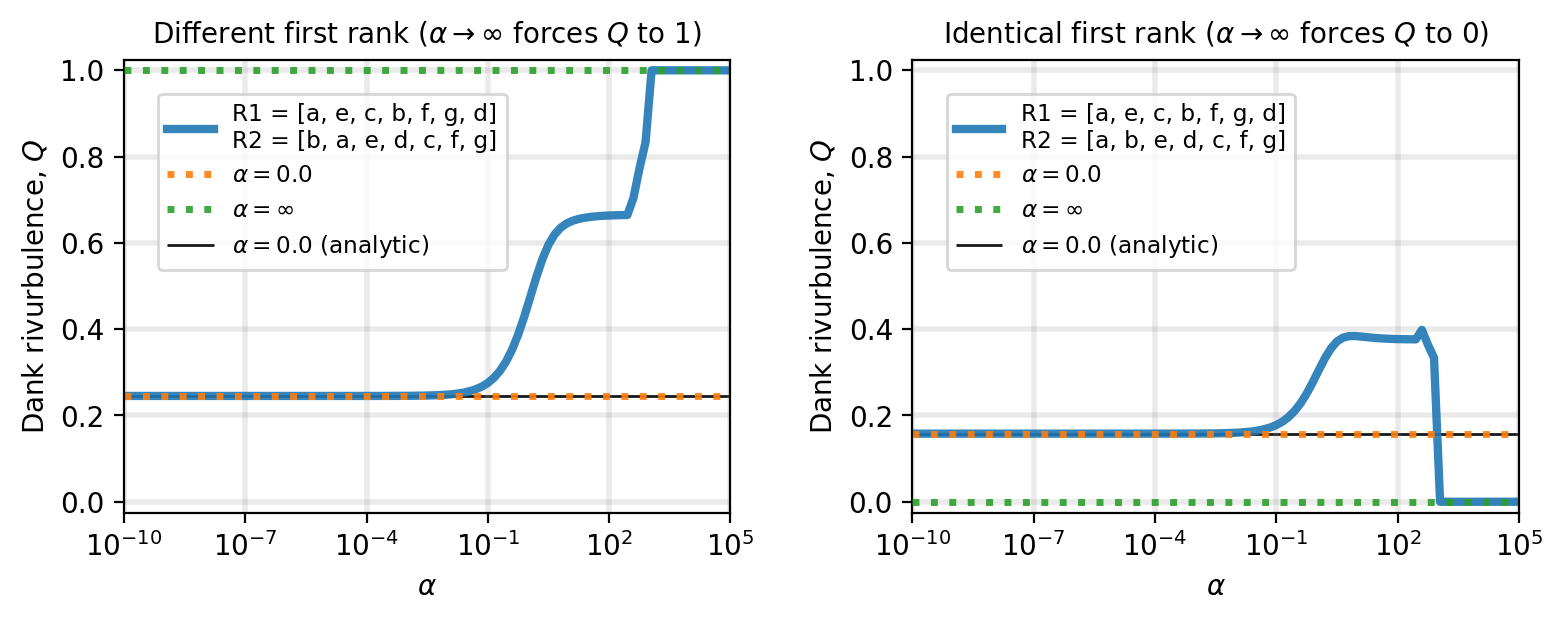

In [18]:
alphs = np.logspace(-10,5,101)

lab1l = 'R1 = ['+', '.join(X1l) + ']\n' + 'R2 = ['+', '.join(X2l)+']'
lab1r = 'R1 = ['+', '.join(X1r) + ']\n' + 'R2 = ['+', '.join(X2r)+']'
lab2 = r'$\alpha=0.0$'
lab3 = r'$\alpha=\infty$'


fig, ax = plt.subplots(1,2,dpi=200, figsize=(9,3))
plt.subplots_adjust(wspace=0.3)



######## Lefthand plot ##########
Qs = [rank_turbulence_divergence(X1l, X2l, alpha) for alpha in alphs]
ax[0].semilogx(alphs, Qs, label=lab1l, linewidth=3, alpha=0.9)

# for when alpha is very small
ax[0].semilogx(alphs, [Qs[0]]* len(alphs), linewidth=2.5,
               label=lab2, linestyle=':', alpha=0.9)

# for when alpha is very large
ax[0].semilogx(alphs, [Qs[-1]]*len(alphs), linewidth=2.5,
               label=lab3, linestyle=':', alpha=0.9, zorder=20)

# analytic approach to calculating Q when alpha = 0.
# See page Section E on page 8 of https://arxiv.org/abs/2002.09770
div_terml = sum([np.abs(np.log(R1l[i]/R2l[i])) for i in R1l.keys()])
norm1l = sum([np.abs(np.log(R1l[i]/(N1l + 0.5*N2l))) for i in R1l.keys()])
norm2l = sum([np.abs(np.log(R2l[i]/(0.5*N1l + N2l))) for i in R1l.keys()])
norml = 1/(norm1l + norm2l)
ax[0].hlines(div_terml*norml, alphs[0], alphs[-1], linewidth=1,
               label=lab2+' (analytic)', linestyle='-', alpha=0.9, zorder=0)



######## Righthand plot ##########
Qs = [rank_turbulence_divergence(X1r, X2r, alpha) for alpha in alphs]
ax[1].semilogx(alphs, Qs, label=lab1r, linewidth=3, alpha=0.9)

# for when alpha is very small
ax[1].semilogx(alphs, [Qs[0]]* len(alphs), linewidth=2.5,
               label=lab2, linestyle=':', alpha=0.9)

# for when alpha is very large
ax[1].semilogx(alphs, [Qs[-1]]*len(alphs), linewidth=2.5,
               label=lab3, linestyle=':', alpha=0.9, zorder=20)

# analytic approach to calculating Q when alpha = 0.
# See page Section E on page 8 of https://arxiv.org/abs/2002.09770
div_termr = sum([np.abs(np.log(R1r[i]/R2r[i])) for i in R1r.keys()])
norm1r = sum([np.abs(np.log(R1r[i]/(N1r + 0.5*N2r))) for i in R1r.keys()])
norm2r = sum([np.abs(np.log(R2r[i]/(0.5*N1r + N2r))) for i in R1r.keys()])
normr = 1/(norm1r + norm2r)
ax[1].hlines(div_termr*normr, alphs[0], alphs[-1], linewidth=1,
               label=lab2+' (analytic)', linestyle='-', alpha=0.9, zorder=0)

for a in fig.axes:
    a.set_ylabel(r'Dank rivurbulence, $Q$')
    a.set_xlabel(r'$\alpha$')
    a.legend(loc='best', bbox_to_anchor=[0.15, 0.45, 0.5, 0.5], fontsize='small')
    a.set_xlim(min(alphs), max(alphs))
    a.set_ylim(-0.025, 1.025)
    a.grid(linewidth=2,color='#999999',alpha=0.2)

ax[0].set_title(r'Different first rank ($\alpha \rightarrow \infty$ forces $Q$ to 1)', fontsize='medium')
ax[1].set_title(r'Identical first rank ($\alpha \rightarrow \infty$ forces $Q$ to 0)', fontsize='medium')



plt.savefig('../figs/pngs/rank_divurbulence.png', dpi=425, bbox_inches='tight')
plt.savefig('../figs/pdfs/rank_divurbulence.pdf', bbox_inches='tight')
plt.show()

__________________

# Example: network comparison via the within-ensemble graph distance
### (using the rank-turbulence divergence)

Also, remember above how we had a pre-sorted list as input data? Well often we just have raw vectors of values, which we need to aggregate into counts and sort. As in the following example:

In [19]:
N = 50
k = 3

G1 = nx.erdos_renyi_graph(N, k/(N-1))
G2 = nx.erdos_renyi_graph(N, k/(N-1))

D1 = list(dict(G1.degree()).values())
D2 = list(dict(G2.degree()).values())

combined_domain = get_combined_domain(D1, D2)
C1 = {i: 0 for i in combined_domain}
C2 = {i: 0 for i in combined_domain}
R1, N1 = get_rank_dictionary(D1, C1)
R2, N2 = get_rank_dictionary(D2, C2)

print("R1 =", R1, "\nhas the same combined_domain as `R2`,",
      "and is currently populated by rank scores of `D1`")
print('\t... also, the raw counts of the degree values in G1 is', dict(Counter(D1)))
print()

print("R2 =", R2, "\nhas the same combined_domain as `R1`,",
      "and is currently populated by rank scores of `D2`")
print('\t... also, the raw counts of the degree values in G2 is', dict(Counter(D2)))

R1 = {0: 7.0, 1: 1.5, 2: 5.0, 3: 1.5, 4: 3.5, 5: 6.0, 6: 3.5, 9: 8.0} 
has the same combined_domain as `R2`, and is currently populated by rank scores of `D1`
	... also, the raw counts of the degree values in G1 is {3: 11, 5: 5, 1: 11, 4: 7, 9: 1, 2: 6, 6: 7, 0: 2}

R2 = {0: 6.0, 1: 4.5, 2: 1.0, 3: 2.5, 4: 2.5, 5: 4.5, 6: 7.0, 9: 8.0} 
has the same combined_domain as `R1`, and is currently populated by rank scores of `D2`
	... also, the raw counts of the degree values in G2 is {6: 2, 1: 5, 5: 5, 3: 10, 2: 14, 0: 4, 4: 10}


/Users/brennan/Desktop/my_code/01_my_code/misc/rank_turbulence_divergence/code/rtd.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  Q = 1/Cr * alph_mul * Q
/Users/brennan/Desktop/my_code/01_my_code/misc/rank_turbulence_divergence/code/rtd.py:160: RuntimeWarning: invalid value encountered in double_scalars
  Q = 1/Cr * alph_mul * Q


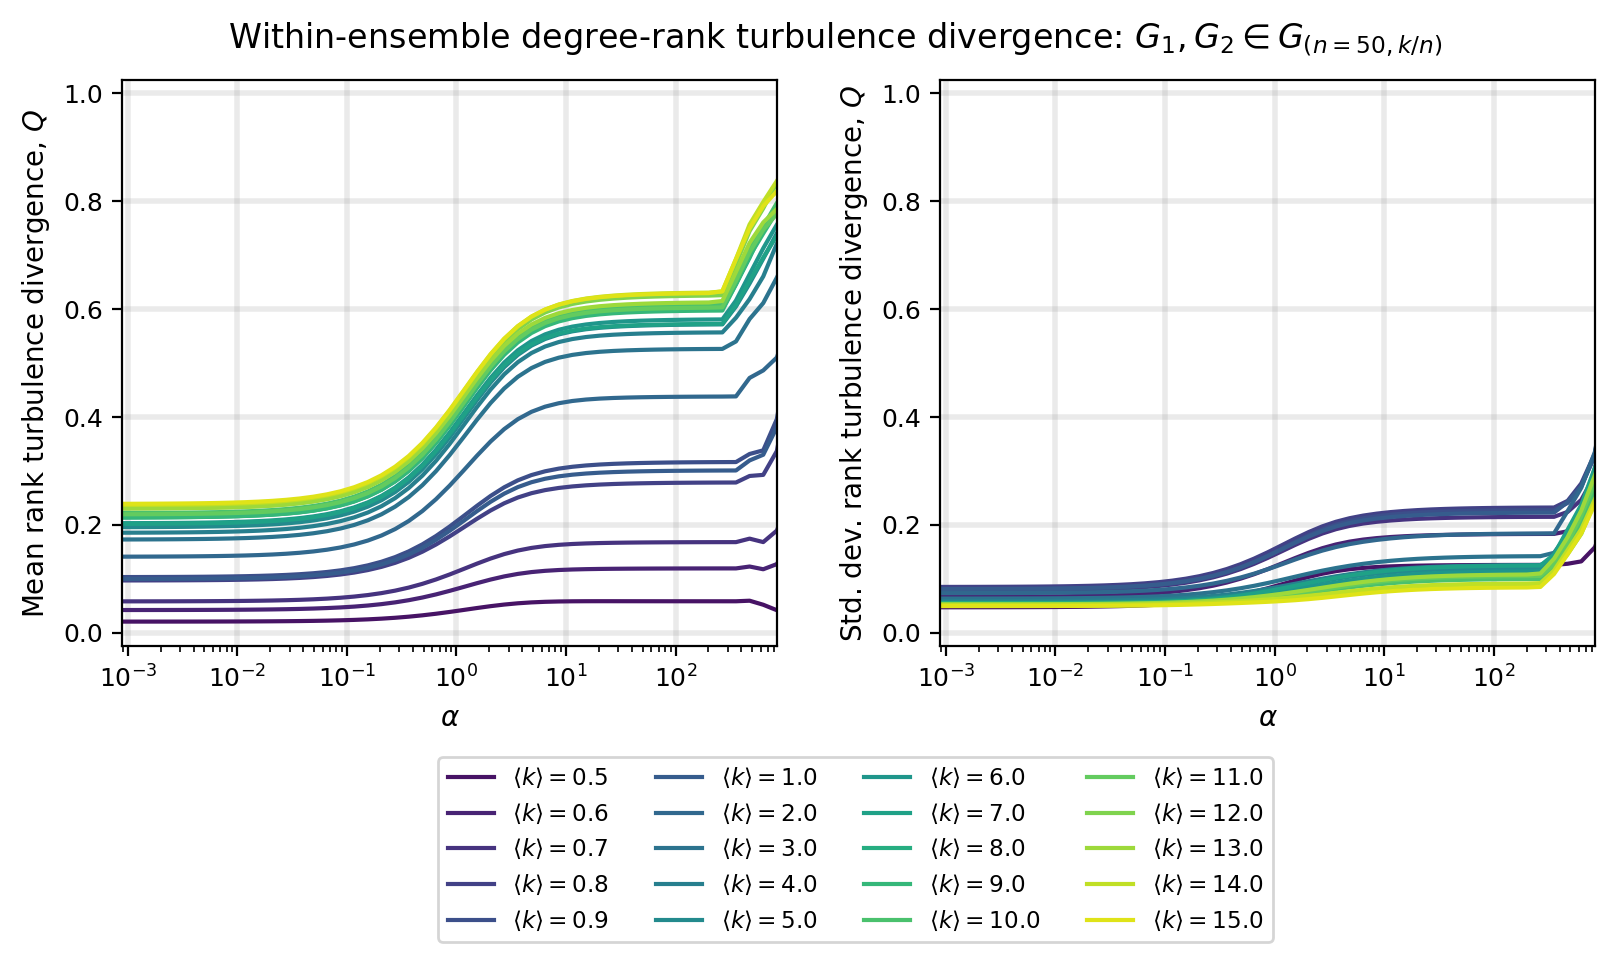

In [20]:
N = 50
ks = [0.5,0.6,0.7,0.8,0.9] + list(np.linspace(1,15,15))
niter = 200
alpha_values = np.logspace(-3.05,3.05,50)
cols = plt.cm.viridis(np.linspace(0.05,0.95,len(ks)))

fig, ax = plt.subplots(1,2,dpi=200, figsize=(9.5,3.75))
plt.subplots_adjust(wspace=0.25)


for ki, k in enumerate(ks):
    alpha_means = []

    for i in range(niter):
        G1 = nx.erdos_renyi_graph(N, k/(N-1))
        G2 = nx.erdos_renyi_graph(N, k/(N-1))

        D1 = list(dict(G1.degree()).values())
        D2 = list(dict(G2.degree()).values())

        alpha_means.append([rank_turbulence_divergence(D1, D2, a)
                            for a in alpha_values])
    
    alpha_means = np.array(alpha_means)
    means = alpha_means.mean(axis=0)
    stdvs = alpha_means.std(axis=0)
    
    ax[0].semilogx(alpha_values, means, color=cols[ki],
                   label=r'$\langle k \rangle = %.1f$'%k)
    ax[1].semilogx(alpha_values, stdvs, color=cols[ki],
                   label=r'$\langle k \rangle = %.1f$'%k)
    

ax[0].set_ylabel(r'Mean rank turbulence divergence, $Q$', fontsize='medium')
ax[1].set_ylabel(r'Std. dev. rank turbulence divergence, $Q$', fontsize='medium')


for a in fig.axes:
    a.set_xlabel(r'$\alpha$')
    a.set_xlim(alpha_values[0], alpha_values[-2])
    a.set_ylim(-0.025, 1.025)
    a.grid(linewidth=2,color='#999999',alpha=0.2)
    a.tick_params(axis='both', which='major', labelsize=9)

ax[1].legend(fontsize='small', bbox_to_anchor=[0.525,-0.175], ncol=4)

plt.suptitle("Within-ensemble degree-rank turbulence divergence: $G_1, G_2 \in G_{(n=%i, k/n)}$"%N, y=0.96)



plt.savefig('../figs/pngs/degree_rank_turb_div_GNP.png', dpi=425, bbox_inches='tight')
plt.savefig('../figs/pdfs/degree_rank_turb_div_GNP.pdf', bbox_inches='tight')

plt.show()

__________________

# Within-ensemble graph distance for $G(n,p)$ by varying $p$
Also, comparing this rank-based divergence to a probability-based one: the `DegreeDivergence()` from **[netrd](https://github.com/netsiphd/netrd)**.

In [21]:
from scipy.stats import entropy
from collections import Counter

def DegreeDivergence(G1, G2):
    """
    Jenson-Shannon divergence between degree distributions.

    Assumes undirected networks.
    
    Source:
    https://github.com/netsiphd/netrd/blob/master/netrd/distance/degree_divergence.py

    Parameters
    ----------
    G1, G2 (nx.Graph):
        two networkx graphs to be compared.

    Returns
    -------
    dist (float):
        the distance between `G1` and `G2`.

    """
    
    def degree_vector_histogram(graph):
        """
        Return the degrees in both formats.

        max_deg is the length of the histogram, to be padded with
        zeros.

        """

        vec = np.array(list(dict(graph.degree()).values()))
        if next(nx.selfloop_edges(graph), False):
            max_deg = len(graph)
        else:
            max_deg = len(graph) - 1
        counter = Counter(vec)
        hist = np.array([counter[v] for v in range(max_deg)])
        return vec, hist

    deg1, hist1 = degree_vector_histogram(G1)
    deg2, hist2 = degree_vector_histogram(G2)

    max_len = max(len(hist1), len(hist2))

    p1 = np.pad(hist1, (0, max_len - len(hist1)), 'constant', constant_values=0)
    p2 = np.pad(hist2, (0, max_len - len(hist2)), 'constant', constant_values=0)
    pm = (p1 + p2)/2

    jsd = 0.5*entropy(p1,pm) + 0.5*entropy(p2,pm)

    return jsd

In [22]:
import datetime as dt
from math import floor, log10

# Make exponent notation pretty, from 
# https://stackoverflow.com/questions/18311909/how-do-i-annotate-with-power-of-ten-formatting
def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = int(floor(log10(abs(num))))
    coeff = round(num / float(10**exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"${0:.{2}f}\cdot10^{{{1:d}}}$".format(coeff, exponent, precision)

### What is the effect of $\alpha$ on the within-ensemble graph distance? (the following cell takes ~4.5 min to run)

In [23]:
N = 50
ntimes = 200

alphs = np.logspace(-3,3,13).round(4)
ps = np.linspace(0,1,41).round(4)

out_dict = {a:{p:[] for p in ps} for a in alphs}
degdiv_dict = {p:[] for p in ps}

for a in alphs:
    print("%.4f  \t"%a, dt.datetime.now())
    for _ in range(ntimes):
        for p in ps:
            G1 = nx.erdos_renyi_graph(N, p)
            G2 = nx.erdos_renyi_graph(N, p)
            D1 = list(dict(G1.degree()).values())
            D2 = list(dict(G2.degree()).values())

            d = rank_turbulence_divergence(D1, D2, a)
            out_dict[a][p].append(d)
            if D1 == D2:
                degdiv_dict[p].append(0)
            else:
                degdiv_dict[p].append(DegreeDivergence(G1, G2))

0.0010  	 2020-03-05 11:31:04.597644
0.0032  	 2020-03-05 11:31:26.192098
0.0100  	 2020-03-05 11:31:47.753603
0.0316  	 2020-03-05 11:32:09.428052
0.1000  	 2020-03-05 11:32:30.880664
0.3162  	 2020-03-05 11:32:52.663417
1.0000  	 2020-03-05 11:33:14.352020
3.1623  	 2020-03-05 11:33:36.312515
10.0000  	 2020-03-05 11:33:59.300414
31.6228  	 2020-03-05 11:34:22.196455
100.0000  	 2020-03-05 11:34:45.065690
316.2278  	 2020-03-05 11:35:08.037436
1000.0000  	 2020-03-05 11:35:29.914288


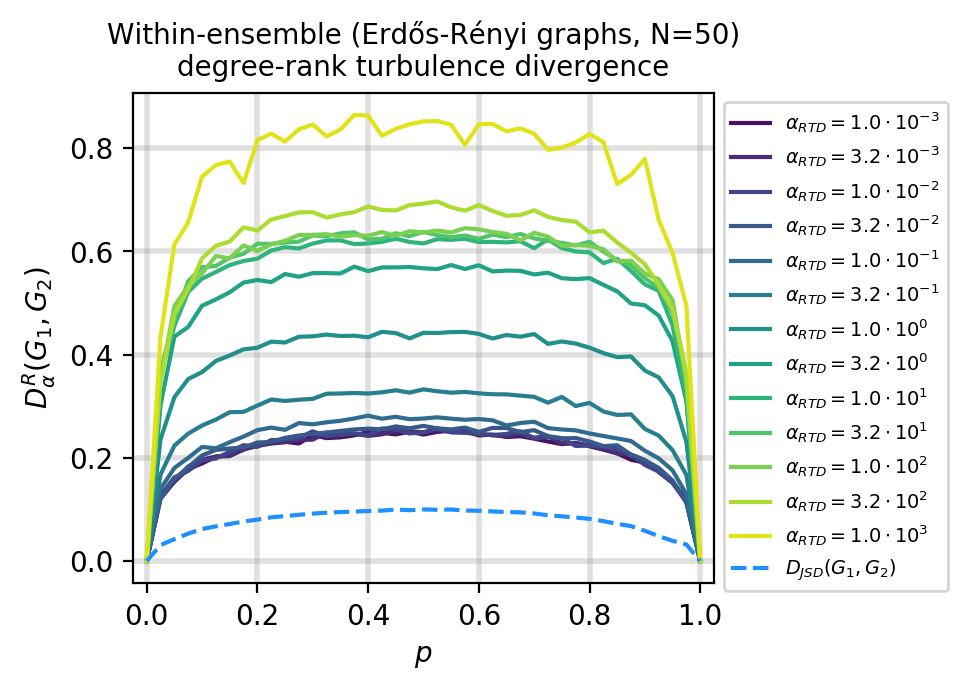

In [24]:
plt.figure(figsize=(3.75,3.25), dpi=200)
cols = plt.cm.viridis(np.linspace(0.05,0.95,len(alphs)))

for ai,a in enumerate(alphs):
    x_vals = list(out_dict[a].keys())
    y_vals = np.array([np.nanmean(out_dict[a][p]) for p in x_vals])
    plt.plot(x_vals, y_vals, '-', label=r"$\alpha_{RTD} =$"+sci_notation(a), color=cols[ai])

x_vals = list(degdiv_dict.keys())
y_vals = np.array([np.mean(degdiv_dict[p]) for p in x_vals])

plt.plot(x_vals, y_vals, '--', label=r'$D_{JSD}(G_1, G_2)$', color='dodgerblue')
plt.legend(fontsize='x-small',bbox_to_anchor=[1.0,1.0])
plt.title("Within-ensemble (Erdős-Rényi graphs, N=%i)\ndegree-rank turbulence divergence"%N,
          fontsize='medium')
plt.ylabel(r"$D_{\alpha}^R (G_1, G_2)$", fontsize='medium')
plt.xlabel(r"$p$", fontsize='medium')
plt.grid(linewidth=2,color='#999999',alpha=0.3)

# plt.ylim(-0.025, 1.025)
plt.xlim(-0.025, 1.025)

plt.savefig('../figs/pngs/graphwend_degree_rank_turb_GNP.png', dpi=425, bbox_inches='tight')
plt.savefig('../figs/pdfs/graphwend_degree_rank_turb_GNP.pdf', bbox_inches='tight')

plt.show()

### What is the effect of network size on this? (the following cell takes ~3.5 min to run)

In [25]:
ntimes = 32
a = 0.5
ps = np.linspace(0,1,21).round(4)
rank_turbul_Ns = np.linspace(100, 400, 7, dtype=int)

out_dict_N_er = {N:{p:[] for p in ps} for N in rank_turbul_Ns}
degdiv_dict_N_er = {N:{p:[] for p in ps} for N in rank_turbul_Ns}

for N in rank_turbul_Ns:
    print("%i \t"%N, dt.datetime.now())
    for _ in range(ntimes):
        for p in ps:
            G1 = nx.erdos_renyi_graph(N, p)
            G2 = nx.erdos_renyi_graph(N, p)
            D1 = list(dict(G1.degree()).values())
            D2 = list(dict(G2.degree()).values())

            d = rank_turbulence_divergence(D1, D2, a)
            out_dict_N_er[N][p].append(d)
            if D1 == D2:
                degdiv_dict_N_er[N][p].append(0)
            else:
                degdiv_dict_N_er[N][p].append(DegreeDivergence(G1, G2))

100 	 2020-03-05 11:35:55.041090
150 	 2020-03-05 11:36:01.344295
200 	 2020-03-05 11:36:13.791607
250 	 2020-03-05 11:36:35.875642
300 	 2020-03-05 11:37:11.748410
350 	 2020-03-05 11:37:58.496164
400 	 2020-03-05 11:39:04.345865


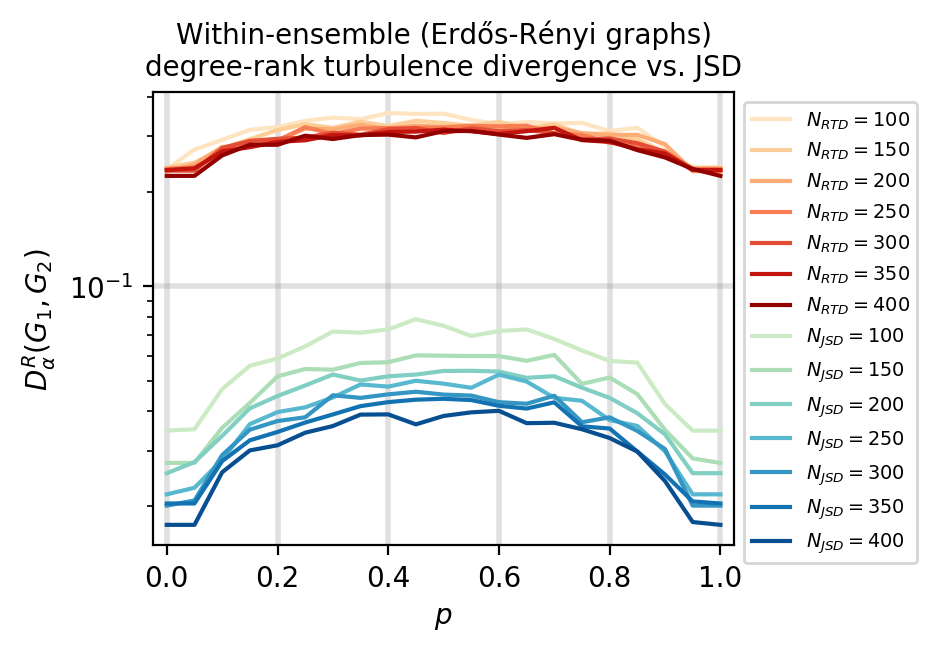

In [26]:
plt.figure(figsize=(3.75,3.0), dpi=200)

cols_1 = plt.cm.OrRd(np.linspace(0.15,0.95,len(rank_turbul_Ns)))
cols_2 = plt.cm.GnBu(np.linspace(0.25,0.95,len(rank_turbul_Ns)))

for Ni, N in enumerate(rank_turbul_Ns):
    x_vals = list(out_dict_N_er[N].keys())
    y_vals = np.array([np.nanmean(out_dict_N_er[N][p]) for p in x_vals])
    y_vals[y_vals==0] = min(y_vals[y_vals>0])
    plt.semilogy(x_vals, y_vals, linestyle='-', label=r"$N_{RTD} = %i$"%N, color=cols_1[Ni])

for Ni, N in enumerate(rank_turbul_Ns):
    x_vals = list(degdiv_dict_N_er[N].keys())
    y_vals = np.array([np.nanmean(degdiv_dict_N_er[N][al]) for al in x_vals])
    y_vals[y_vals==0] = min(y_vals[y_vals>0])
    plt.semilogy(x_vals, y_vals, linestyle='-', label=r"$N_{JSD} = %i$"%N, color=cols_2[Ni])

plt.legend(fontsize='x-small',bbox_to_anchor=[1.0,1.0])
plt.title("Within-ensemble (Erdős-Rényi graphs)\ndegree-rank turbulence divergence vs. JSD",
          fontsize='medium')
plt.ylabel(r"$D_{\alpha}^R (G_1, G_2)$", fontsize='medium')
plt.xlabel(r"$p$", fontsize='medium')
plt.grid(linewidth=2,color='#999999',alpha=0.3)

# plt.ylim(-0.025, 1.025)
plt.xlim(-0.025, 1.025)

plt.savefig('../figs/pngs/graphwend_degree_rank_turb_vs_degdiv_N_GNP.png', dpi=425, bbox_inches='tight')
plt.savefig('../figs/pdfs/graphwend_degree_rank_turb_vs_degdiv_N_GNP.pdf', bbox_inches='tight')

plt.show()

________________________

## Same within-ensemble graph distance, this time with preferential attachment networks
...varying the amount of preferential attachment via the attachment kernel (unfortunately also named $\alpha$, though I'll try to refer to this one as the "kernel")

In [27]:
def preferential_attachment_network(N, alpha=1.0, m=1):
    r"""
    Generates a network based off of a preferential attachment growth rule.
    Under this growth rule, new nodes place their $m$ edges to nodes already
    present in the graph, G, with a probability proportional to $k^\alpha$.

    Parameters
    ----------
    N (int): the desired number of nodes in the final network
    alpha (float): the exponent of preferential attachment. When alpha is less
                  than 1.0, we describe it as sublinear preferential
                  attachment. At alpha > 1.0, it is superlinear preferential
                  attachment. And at alpha=1.0, the network was grown under
                  linear preferential attachment, as in the case of
                  Barabasi-Albert networks.
    m (int): the number of new links that each new node joins the network with.

    Returns
    -------
    G (nx.Graph): a graph grown under preferential attachment.

    """

    G = nx.complete_graph(m+1)

    for node_i in range(m+1, N):
        degrees = np.array(list(dict(G.degree()).values()))
        probs = (degrees**alpha) / sum(degrees**alpha)
        eijs = np.random.choice(
                   G.number_of_nodes(), size=(m,),
                   replace=False, p=probs)
        for node_j in eijs:
            G.add_edge(node_i, node_j)

    return G

### What is the effect of $\alpha$ on the within-ensemble graph distance? (the following cell takes ~12 min to run)

In [32]:
N = 100
ntimes = 64 # tweak this cell if you want it to go quicker
m = 1
pref_attach_alphas = np.linspace(-5.0,7.0,41).round(4)
rank_turbul_alphas = np.logspace(-3.0,3.0,13).round(4)

out_dict_pa = {a:{al:[] for al in pref_attach_alphas} for a in rank_turbul_alphas}
degdiv_dict_pa = {al:[] for al in pref_attach_alphas}

for a in rank_turbul_alphas:
    print("%.4f  \t"%a, dt.datetime.now())
    for _ in range(ntimes):
        for alpha in pref_attach_alphas:
            G1 = preferential_attachment_network(N, alpha=alpha, m=m)
            G2 = preferential_attachment_network(N, alpha=alpha, m=m)

            D1 = list(dict(G1.degree()).values())
            D2 = list(dict(G2.degree()).values())

            d = rank_turbulence_divergence(D1, D2, a)
            out_dict_pa[a][alpha].append(d)

            if D1 == D2:
                degdiv_dict_pa[alpha].append(0)
            else:
                degdiv_dict_pa[alpha].append(DegreeDivergence(G1, G2))

0.0010  	 2020-03-05 12:06:57.234460
0.0032  	 2020-03-05 12:08:02.066066
0.0100  	 2020-03-05 12:09:03.505229
0.0316  	 2020-03-05 12:10:01.480886
0.1000  	 2020-03-05 12:11:00.232002
0.3162  	 2020-03-05 12:11:58.643484
1.0000  	 2020-03-05 12:12:57.157571
3.1623  	 2020-03-05 12:13:55.459094
10.0000  	 2020-03-05 12:14:53.015929
31.6228  	 2020-03-05 12:15:50.402816
100.0000  	 2020-03-05 12:16:47.833226
316.2278  	 2020-03-05 12:17:45.341392
1000.0000  	 2020-03-05 12:18:44.034242


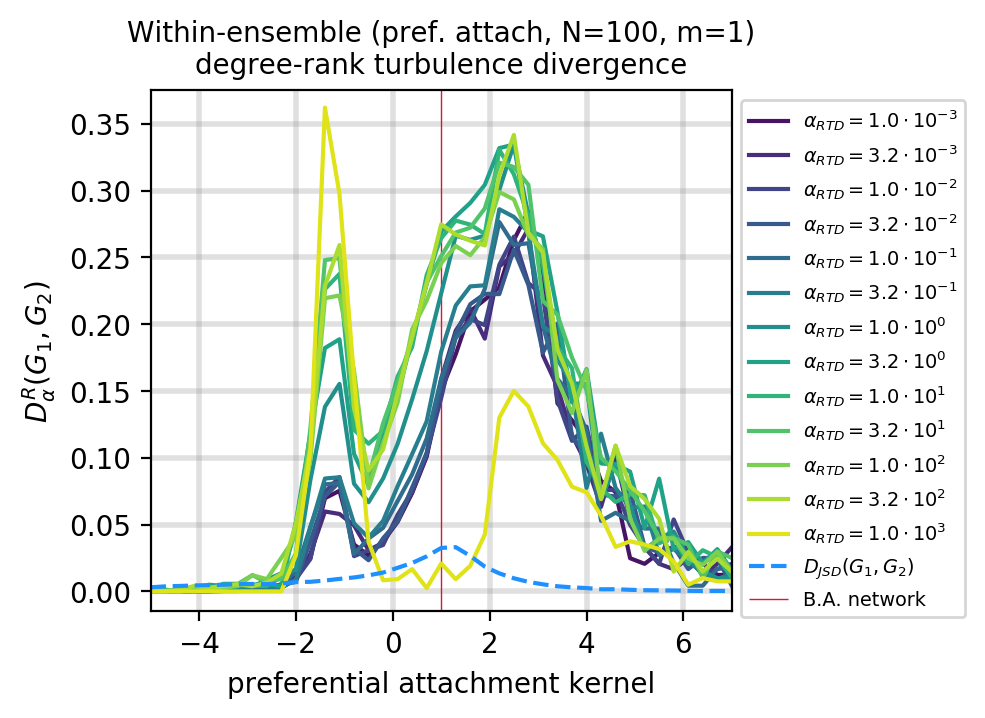

In [33]:
plt.figure(figsize=(3.75,3.45), dpi=200)
cols = plt.cm.viridis(np.linspace(0.05,0.95,len(alphs)))

for ai, a in enumerate(rank_turbul_alphas):
    x_vals = list(out_dict_pa[a].keys())
    y_vals = np.array([np.nanmean(out_dict_pa[a][al]) for al in x_vals])
    plt.plot(x_vals, y_vals, linestyle='-', label=r"$\alpha_{RTD} =$"+sci_notation(a), color=cols[ai])

x_vals = list(degdiv_dict_pa.keys())
y_vals = np.array([np.nanmean(degdiv_dict_pa[al]) for al in x_vals])

plt.plot(x_vals, y_vals, linestyle='--', label=r'$D_{JSD}(G_1, G_2)$', color='dodgerblue')
plt.vlines(1, -1, 1, linestyle='-', label='B.A. network', color='crimson', linewidth=0.5)


plt.legend(fontsize='x-small',bbox_to_anchor=[1.0,1.0])
plt.title("Within-ensemble (pref. attach, N=%i, m=%i)\ndegree-rank turbulence divergence"%(N,m),
          fontsize='medium')
plt.grid(linewidth=2,color='#999999',alpha=0.3)
plt.xlabel(r'preferential attachment kernel', fontsize='medium')
plt.ylabel(r"$D_{\alpha}^{ R} (G_1, G_2)$", fontsize='medium')
plt.ylim(-0.015, 0.375)
plt.xlim(x_vals[0], x_vals[-1])

plt.savefig('../figs/pngs/graphwend_degree_rank_turb_GPA_%03i.png'%N, dpi=425, bbox_inches='tight')
plt.savefig('../figs/pdfs/graphwend_degree_rank_turb_GPA_%03i.pdf'%N, bbox_inches='tight')

plt.show()

### What is the effect of network size in this context? (the following cell takes ~17 min to run)

In [30]:
ntimes = 32 # tweak this cell if you want it to go quicker
m = 1
pref_attach_alphas = np.linspace(-5.0,7.0,41).round(4)
rank_turbul_Ns = np.linspace(100, 500, 9, dtype=int)

out_dict_N_pa = {N:{al:[] for al in pref_attach_alphas} for N in rank_turbul_Ns}
degdiv_dict_N_pa = {N:{al:[] for al in pref_attach_alphas} for N in rank_turbul_Ns}
a = 1.0

for N in rank_turbul_Ns:
    print("%i \t"%N, dt.datetime.now())
    for _ in range(ntimes):
        for alpha in pref_attach_alphas:
            G1 = preferential_attachment_network(N, alpha=alpha, m=m)
            G2 = preferential_attachment_network(N, alpha=alpha, m=m)

            D1 = list(dict(G1.degree()).values())
            D2 = list(dict(G2.degree()).values())

            d = rank_turbulence_divergence(D1, D2, a)
            out_dict_N_pa[N][alpha].append(d)

            if D1 == D2:
                degdiv_dict_N_pa[N][alpha].append(0)
            else:
                degdiv_dict_N_pa[N][alpha].append(DegreeDivergence(G1, G2))

100 	 2020-03-05 11:43:57.178164
150 	 2020-03-05 11:44:26.845872
200 	 2020-03-05 11:45:15.931344
250 	 2020-03-05 11:46:29.220437
300 	 2020-03-05 11:48:10.041404
350 	 2020-03-05 11:50:20.377498
400 	 2020-03-05 11:53:03.699714
450 	 2020-03-05 11:56:23.311455
500 	 2020-03-05 12:00:25.562006


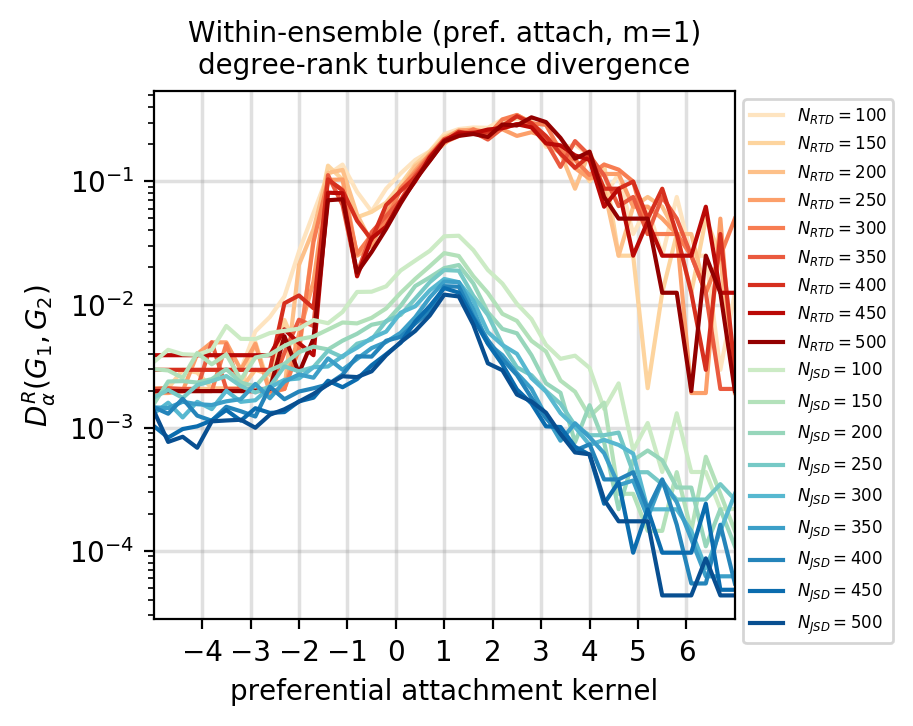

In [31]:
plt.figure(figsize=(3.75,3.5), dpi=200)
cols_1 = plt.cm.OrRd(np.linspace(0.15,0.95,len(rank_turbul_Ns)))
cols_2 = plt.cm.GnBu(np.linspace(0.25,0.95,len(rank_turbul_Ns)))

for Ni, N in enumerate(rank_turbul_Ns):
    x_vals = list(out_dict_N_pa[N].keys())
    y_vals = np.array([np.nanmean(out_dict_N_pa[N][al]) for al in x_vals])
    y_vals[y_vals==0] = min(y_vals[y_vals>0])
    plt.semilogy(x_vals, y_vals, linestyle='-', label=r"$N_{RTD} = %i$"%N, color=cols_1[Ni])

for Ni, N in enumerate(rank_turbul_Ns):
    x_vals = list(degdiv_dict_N_pa[N].keys())
    y_vals = np.array([np.nanmean(degdiv_dict_N_pa[N][al]) for al in x_vals])
    y_vals[y_vals==0] = min(y_vals[y_vals>0])
    plt.semilogy(x_vals, y_vals, linestyle='-', label=r"$N_{JSD} = %i$"%N, color=cols_2[Ni])

# plt.vlines(1, -1, 1, linestyle='-', label='B.A. network', color='crimson', linewidth=0.5)

plt.legend(fontsize=6,bbox_to_anchor=[1.0,1.0],ncol=1)
plt.title("Within-ensemble (pref. attach, m=%i)\ndegree-rank turbulence divergence"%(m),
          fontsize='medium')
plt.grid(linewidth=1.25,color='#999999',alpha=0.3)
plt.xticks(np.linspace(-4,6,11))
plt.xlabel(r'preferential attachment kernel', fontsize='medium')
plt.ylabel(r"$D_{\alpha}^{ R} (G_1, G_2)$", fontsize='medium')
# plt.ylim(-0.015, 0.425)
plt.xlim(x_vals[0], x_vals[-1])

plt.savefig('../figs/pngs/degree_rank_turb_vs_degdiv_N_GPA.png', dpi=425, bbox_inches='tight')
plt.savefig('../figs/pdfs/degree_rank_turb_vs_degdiv_N_GPA.pdf', bbox_inches='tight')

plt.show()

# Key takeaways: